In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import spacy

In [4]:
import seaborn as sns

In [5]:
from spacy import displacy

In [6]:
from spacy import tokenizer

In [7]:
import re

In [8]:
import nltk

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [11]:
from nltk.corpus import stopwords

In [12]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [13]:
import gensim

In [14]:
import gensim.corpora as corpora

In [15]:
from gensim.models.coherencemodel import CoherenceModel

In [16]:
from gensim.models import LsiModel,  TfidfModel

In [17]:
from sklearn.feature_extraction.text import TfidfTransformer

In [18]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [21]:
from sklearn.metrics import accuracy_score, classification_report

In [22]:
plt.rcParams['figure.figsize'] = (12,8)

In [23]:
default_plot_colour = "#00bfbf"

In [24]:
data = pd.read_csv('fake_news_data.csv')

In [25]:
data.head()


,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            198 non-null    object
 1   text             198 non-null    object
 2   date             198 non-null    object
 3   fake_or_factual  198 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [27]:
data['fake_or_factual']

0         Fake News
1         Fake News
2         Fake News
3      Factual News
4      Factual News
           ...     
193       Fake News
194       Fake News
195       Fake News
196    Factual News
197       Fake News
Name: fake_or_factual, Length: 198, dtype: object

In [28]:
data['fake_or_factual'].value_counts()

fake_or_factual
Factual News    100
Fake News        98
Name: count, dtype: int64

<Axes: xlabel='fake_or_factual'>

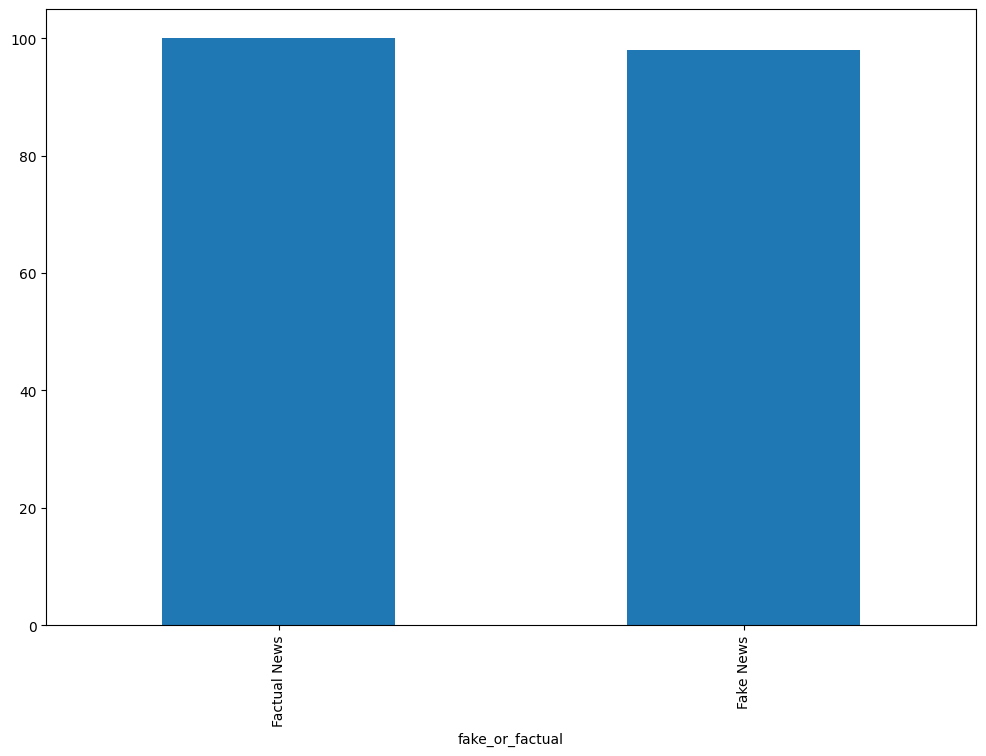

In [29]:
data['fake_or_factual'].value_counts().plot(kind='bar')

In [30]:
# Exploring data set

In [31]:
# POS TAGGING

nlp = spacy.load('en_core_web_sm');


In [32]:
fake_news =  data[data['fake_or_factual'] == 'Fake News']

In [33]:
fact_news =  data[data['fake_or_factual'] == 'Factual News']

In [34]:
fake_news

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
5,Maxine Waters Makes Teens Chant ‘Impeach 45′ a...,Shame on Teen Vogue! Maxine Waters was a guest...,"Dec 10, 2017",Fake News
6,Jay Carney Let It Slip That He Knows Who Obam...,Former White House Press Secretary in the Obam...,"February 10, 2016",Fake News
...,...,...,...,...
191,Terrorist Jon Ritzheimer Uses Sobbing Daughte...,"Jon Ritzheimer, infamous hater of Muslims and ...","January 26, 2016",Fake News
193,AND SO IT BEGINS…INSPIRED BY GAY MARRIAGE RULI...,"Well, that didn t take long. Look for the firs...","Jul 2, 2015",Fake News
194,‘Stand Your Ground’: FL Man Shoots At Teens P...,Florida s toxic and dangerous stand your grou...,"July 17, 2016",Fake News
195,The Los Angeles Times Endorses Hillary Clinto...,As Politico reports an almost neck-and-neck ra...,"May 30, 2016",Fake News


In [35]:
fake_spacydocs = list(nlp.pipe(fake_news['text']))
fact_spacydocs = list(nlp.pipe(fact_news['text']))

In [36]:
def extract_token_tags(docs: spacy.tokens.doc.Doc):
    return [ (i.text, i.ent_type_, i.pos_) for i in docs]

In [37]:
fake_tagsdf = []

In [38]:
columns = ["token", "ner_tag", "pos_tag"]

# "token" → word itself

# "ner_tag" → named entity type (like PERSON, ORG, GPE)

# "pos_tag" → part of speech (NOUN, VERB, etc.)

In [39]:
# enumerate(iterable, start=0) wraps any iterable and yields pairs (index, item)
for ix, doc in enumerate(fake_spacydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fake_tagsdf.append(tags)

In [40]:
fake_tagsdf = pd.concat(fake_tagsdf)


In [41]:
fake_tagsdf

,token,ner_tag,pos_tag
0,There,,PRON
1,are,,VERB
2,two,CARDINAL,NUM
3,small,,ADJ
4,problems,,NOUN
...,...,...,...
743,.,,PUNCT
744,Via,,PROPN
745,:,,PUNCT
746,Campus,PERSON,PROPN


In [42]:

fact_tagsdf = []

In [43]:
for ix, doc in enumerate(fact_spacydocs):
    tags = extract_token_tags(doc)
    tags = pd.DataFrame(tags)
    tags.columns = columns
    fact_tagsdf.append(tags)

In [44]:
fact_tagsdf = pd.concat(fact_tagsdf)

In [45]:
fact_tagsdf

,token,ner_tag,pos_tag
0,WASHINGTON,GPE,PROPN
1,(,,PUNCT
2,Reuters,ORG,PROPN
3,),,PUNCT
4,-,,PUNCT
...,...,...,...
85,citing,,VERB
86,three,CARDINAL,NUM
87,unnamed,,ADJ
88,officials,,NOUN


In [46]:
pos_counts_fake = fake_tagsdf.groupby(['token', 'pos_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [47]:
pos_counts_fake

,token,pos_tag,counts
29,",",PUNCT,1908
7451,the,DET,1834
41,.,PUNCT,1530
5766,of,ADP,922
2665,and,CCONJ,875
...,...,...,...
3770,detectives,VERB,1
3769,detective,NOUN,1
3768,detained,VERB,1
3766,detail,NOUN,1


In [48]:
pos_counts_fact = fact_tagsdf.groupby(['token','pos_tag']).size().reset_index(name='counts').sort_values(by='counts',ascending=False)

In [49]:
pos_counts_fact

,token,pos_tag,counts
6145,the,DET,1903
14,",",PUNCT,1698
21,.,PUNCT,1382
4716,of,ADP,884
1898,a,DET,789
...,...,...,...
2909,crossing,VERB,1
2911,crucial,ADJ,1
2913,cruise,NOUN,1
2914,crusade,NOUN,1


In [50]:
pos_counts_fake.groupby('pos_tag')['token'].count().sort_values(ascending=False)

pos_tag
NOUN     2586
VERB     1817
PROPN    1672
ADJ       882
ADV       413
NUM       221
PRON       96
ADP        89
AUX        62
SCONJ      51
DET        42
INTJ       24
PUNCT      23
CCONJ      19
X          14
PART       10
SYM         5
SPACE       3
Name: token, dtype: int64

In [51]:
pos_counts_fact.groupby('pos_tag')['token'].count().sort_values(ascending=False)


pos_tag
NOUN     2179
VERB     1539
PROPN    1379
ADJ       747
ADV       263
NUM       205
PRON       79
ADP        70
AUX        43
SCONJ      42
DET        36
PUNCT      22
SPACE      11
CCONJ      11
X          10
INTJ        7
PART        7
SYM         4
Name: token, dtype: int64

In [52]:
pos_counts_fake[pos_counts_fake.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
5981,people,NOUN,77
7349,t,NOUN,65
6216,president,NOUN,58
7960,women,NOUN,55
7516,time,NOUN,52
3138,campaign,NOUN,44
8011,year,NOUN,44
4581,government,NOUN,41
5213,law,NOUN,40
8013,years,NOUN,40


In [53]:
pos_counts_fact[pos_counts_fact.pos_tag == 'NOUN'][:15]

,token,pos_tag,counts
3738,government,NOUN,71
6618,year,NOUN,64
5901,state,NOUN,57
2360,bill,NOUN,55
1975,administration,NOUN,51
5066,president,NOUN,49
3277,election,NOUN,48
4919,people,NOUN,45
4786,order,NOUN,45
4259,law,NOUN,42


In [54]:
# NAMES ENTITIES

In [55]:
top_entites_fake = fake_tagsdf[fake_tagsdf['ner_tag'] != ''].groupby(['token','ner_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [56]:
top_entites_fake

,token,ner_tag,counts
1730,Trump,PERSON,154
1729,Trump,ORG,152
2129,the,ORG,121
592,Clinton,PERSON,118
718,Donald,PERSON,75
...,...,...,...
886,Hempstead,GPE,1
885,Helbig,PERSON,1
884,Hedge,PERSON,1
883,Heather,PERSON,1


In [57]:
top_entites_fact = fact_tagsdf[fact_tagsdf['ner_tag'] != ''].groupby(['token','ner_tag']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

In [58]:
top_entites_fact

,token,ner_tag,counts
1968,the,ORG,159
1633,U.S.,GPE,138
1373,Reuters,ORG,131
1615,Trump,PERSON,125
1614,Trump,ORG,124
...,...,...,...
804,German,NORP,1
803,Georgia,GPE,1
801,George,ORG,1
800,Geological,ORG,1


In [59]:
ner_palette = {
    'ORG': sns.color_palette("Set2").as_hex()[0],
    'GPE': sns.color_palette("Set2").as_hex()[1],
    'NORP': sns.color_palette("Set2").as_hex()[2],
    'PERSON': sns.color_palette("Set2").as_hex()[3],
    'DATE': sns.color_palette("Set2").as_hex()[4],
    'CARDINAL': sns.color_palette("Set2").as_hex()[5],
    'PERCENT': sns.color_palette("Set2").as_hex()[6]
}


In [60]:
# Seaborn, a popular data visualization library. Seaborn is built on top of Matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

[Text(0.5, 1.0, 'Most common named entites')]

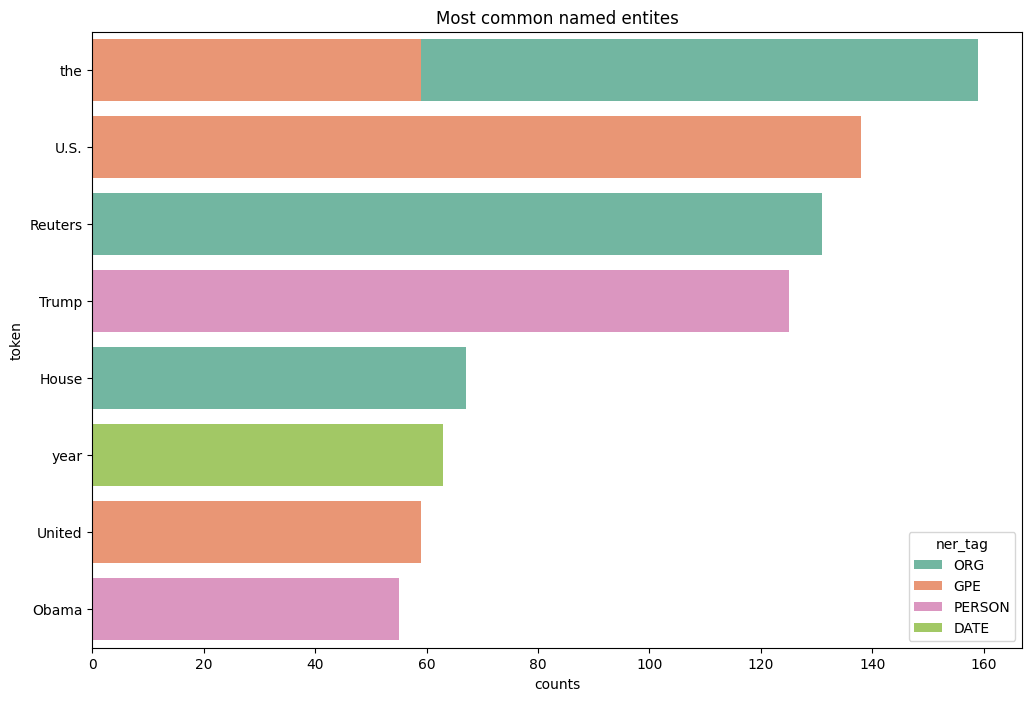

In [61]:
sns.barplot(x = 'counts', 
            y = 'token', 
            hue = 'ner_tag', 
            palette= ner_palette, 
            data = top_entites_fact[:10], 
            orient='h', 
            dodge=False).set(title='Most common named entites') 

[Text(0.5, 1.0, 'Most common named entites')]

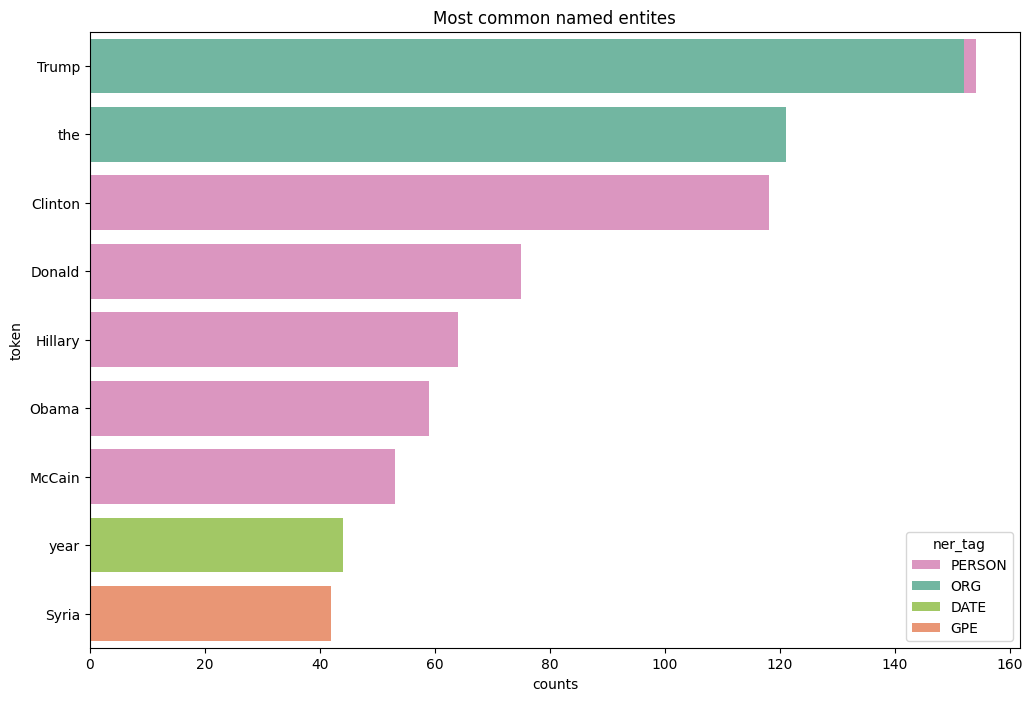

In [62]:
sns.barplot(x = 'counts', 
            y = 'token', 
            hue = 'ner_tag', 
            palette= ner_palette, 
            data = top_entites_fake[:10], 
            orient='h', 
            dodge=False).set(title='Most common named entites')

In [63]:
data.head()

,title,text,date,fake_or_factual
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News


In [64]:
data['text_clean'] = data.apply(lambda x: re.sub(r"^[^-]*-\s", "", x["text"]) ,axis=1)

In [65]:
data.head()

,title,text,date,fake_or_factual,text_clean
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,There are two small problems with your analogy...
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,Buried in Trump s bonkers interview with New Y...
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"Women make up over 50 percent of this country,..."
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,U.S. Defense Secretary Jim Mattis said on Mond...
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,Northern Ireland s political parties are rapid...


In [66]:
data['text_clean'] = data['text_clean'].str.lower()

In [67]:
data['text_clean'] = data.apply(lambda x: re.sub(r"([^\w\s])", "", x["text_clean"]) ,axis=1)

In [68]:
en_stopwords = stopwords.words('english')

In [69]:
en_stopwords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [70]:
data['text_clean'] =  data['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (en_stopwords) ]))

In [71]:
data['text_clean'] = data.apply(lambda x: word_tokenize(x['text_clean']), axis=1)

In [72]:
lemmatizer  = WordNetLemmatizer()

In [73]:
data['text_clean'] = data['text_clean'].apply(lambda tokens: [lemmatizer.lemmatize(token) for token in tokens]) 

In [74]:
tokens_clean =  sum(data['text_clean'], [])

In [75]:
tokens_clean

['two',
 'small',
 'problem',
 'analogy',
 'susan',
 'jesus',
 'muslim',
 'joseph',
 'traveled',
 'bethlehem',
 'mary',
 'anyone',
 'paying',
 'attention',
 'appear',
 'many',
 'female',
 'refugee',
 'accompanying',
 'male',
 'muslim',
 'refugee',
 'greecesusan',
 'sarandon',
 'spent',
 'christmas',
 'holiday',
 'greek',
 'island',
 'lesbos',
 'assisting',
 'international',
 'organization',
 'mounting',
 'syrian',
 'refugee',
 'crisis',
 'crisis',
 'say',
 'recall',
 'travail',
 'joseph',
 'mary',
 'way',
 'inn',
 'bethlehemin',
 'column',
 'huffington',
 'post',
 'ryot',
 '69yearold',
 'oscarwinning',
 'actress',
 'described',
 'meeting',
 '16yearold',
 'girl',
 'apparently',
 'given',
 'birth',
 'shortly',
 'arriving',
 'island',
 'smile',
 'approach',
 'without',
 'translator',
 'conversation',
 'basicfriendly',
 'sarandon',
 'wrote',
 'experience',
 'take',
 'bundle',
 'next',
 'open',
 'inside',
 'perfect',
 'rosy',
 'newborn',
 'actress',
 'continuesshe',
 'beaming',
 'proud',
 '

In [76]:

unigrams = (pd.Series(nltk.ngrams(tokens_clean, 1)).value_counts())

In [77]:
unigrams

(said,)          580
(trump,)         580
(u,)             277
(state,)         275
(president,)     259
                ... 
(summoned,)        1
(dime,)            1
(learnedthe,)      1
(alarmingly,)      1
(petrosyan,)       1
Name: count, Length: 9069, dtype: int64

In [78]:

biograms = (pd.Series(nltk.ngrams(tokens_clean, 2)).value_counts())

In [79]:
biograms

(donald, trump)           113
(united, state)            84
(white, house)             74
(president, donald)        47
(hillary, clinton)         39
                         ... 
(extremely, concerned)      1
(trump, extremely)          1
(wednesday, president)      1
(software, white)           1
(campus, reform)            1
Name: count, Length: 36973, dtype: int64

In [80]:
vader_sentiment = SentimentIntensityAnalyzer()

In [81]:
data['vader_sentiment_scrore'] = data['text'].apply(lambda x: vader_sentiment.polarity_scores(x)['compound'])

In [82]:
data.head()

,title,text,date,fake_or_factual,text_clean,vader_sentiment_scrore
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590


In [83]:
bins = [-1, -0.1, 0.1, 1]
names = ['negative', 'neutral', 'positive']


In [84]:
data['vader_sentiment_label'] = pd.cut(
    data['vader_sentiment_scrore'],
    bins,
    labels=names
)



In [85]:
data.head()

,title,text,date,fake_or_factual,text_clean,vader_sentiment_scrore,vader_sentiment_label
0,HOLLYWEIRD LIB SUSAN SARANDON Compares Muslim ...,There are two small problems with your analogy...,"Dec 30, 2015",Fake News,"[two, small, problem, analogy, susan, jesus, m...",-0.3660,negative
1,Elijah Cummings Called Trump Out To His Face ...,Buried in Trump s bonkers interview with New Y...,"April 6, 2017",Fake News,"[buried, trump, bonkers, interview, new, york,...",-0.8197,negative
2,Hillary Clinton Says Half Her Cabinet Will Be...,"Women make up over 50 percent of this country,...","April 26, 2016",Fake News,"[woman, make, 50, percent, country, grossly, u...",0.9779,positive
3,Russian bombing of U.S.-backed forces being di...,WASHINGTON (Reuters) - U.S. Defense Secretary ...,"September 18, 2017",Factual News,"[u, defense, secretary, jim, mattis, said, mon...",-0.3400,negative
4,Britain says window to restore Northern Irelan...,BELFAST (Reuters) - Northern Ireland s politic...,"September 4, 2017",Factual News,"[northern, ireland, political, party, rapidly,...",0.8590,positive


<Axes: xlabel='vader_sentiment_label'>

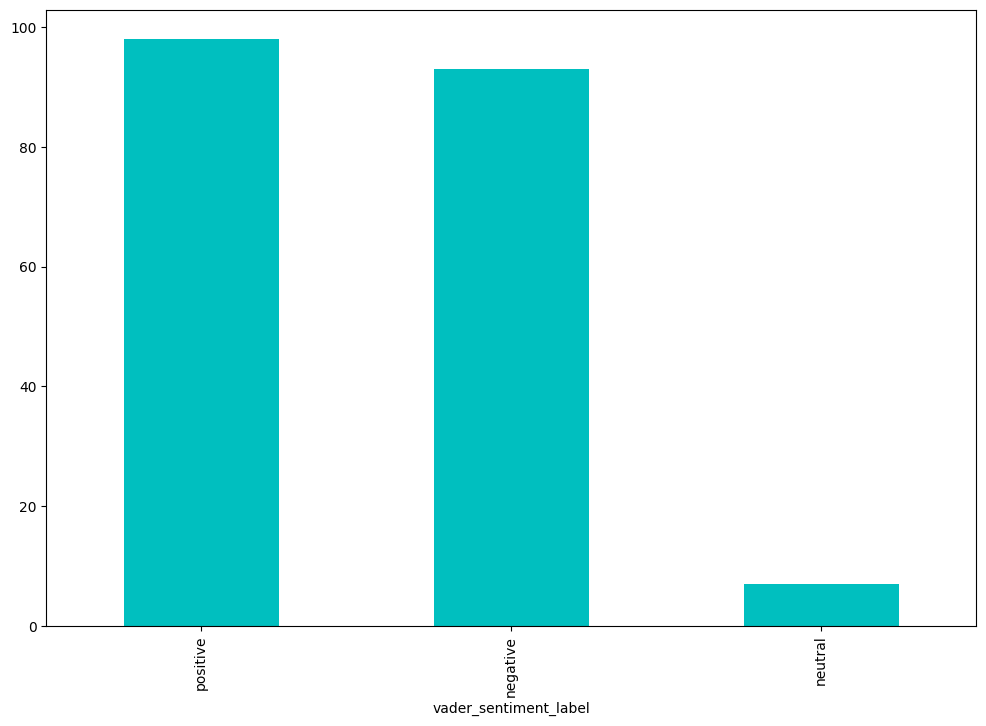

In [86]:
data['vader_sentiment_label'].value_counts().plot.bar(color=default_plot_colour)


/var/folders/56/_mkrg59j5qb4043yrf8fwy540000gn/T/ipykernel_8865/4040252218.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(


[Text(0.5, 1.0, 'Sentiment by News Type')]

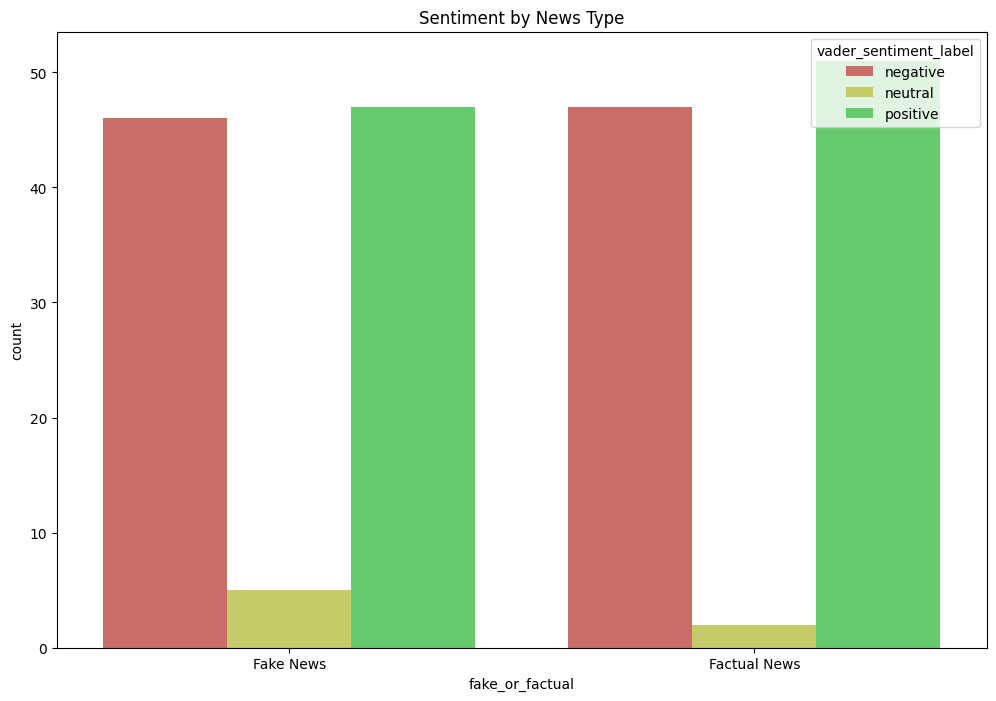

In [87]:
sns.countplot(
    x='fake_or_factual',
    hue='vader_sentiment_label',
    palette=sns.color_palette("hls"),
    data=data
).set(title="Sentiment by News Type")


In [88]:
fake_news_text = data[data['fake_or_factual'] == "Fake News"]['text_clean'].reset_index(drop=True)


In [89]:
dictionary_fake = corpora.Dictionary(fake_news_text)

In [90]:
fake_news_text

0     [two, small, problem, analogy, susan, jesus, m...
1     [buried, trump, bonkers, interview, new, york,...
2     [woman, make, 50, percent, country, grossly, u...
3     [shame, teen, vogue, maxine, water, guest, tee...
4     [former, white, house, press, secretary, obama...
                            ...                        
93    [jon, ritzheimer, infamous, hater, muslim, one...
94    [well, take, long, look, first, beastiality, m...
95    [florida, toxic, dangerous, stand, ground, gun...
96    [politico, report, almost, neckandneck, race, ...
97    [small, obscure, community, college, disallowi...
Name: text_clean, Length: 98, dtype: object

In [91]:
dictionary_fake


In [92]:
doc_term_fake = [dictionary_fake.doc2bow(text) for text in fake_news_text]


In [93]:
coherence_values = []
model_list = []

min_topics = 2
max_topics = 11

for num_topics_i in range(min_topics, max_topics + 1):
    model = gensim.models.LdaModel(
        doc_term_fake,
        num_topics=num_topics_i,
        id2word=dictionary_fake
    )
    model_list.append(model)
    
    coherence_model = CoherenceModel(
        model=model,
        texts=fake_news_text,
        dictionary=dictionary_fake,
        coherence='c_v'
    )
    coherence_values.append(coherence_model.get_coherence())


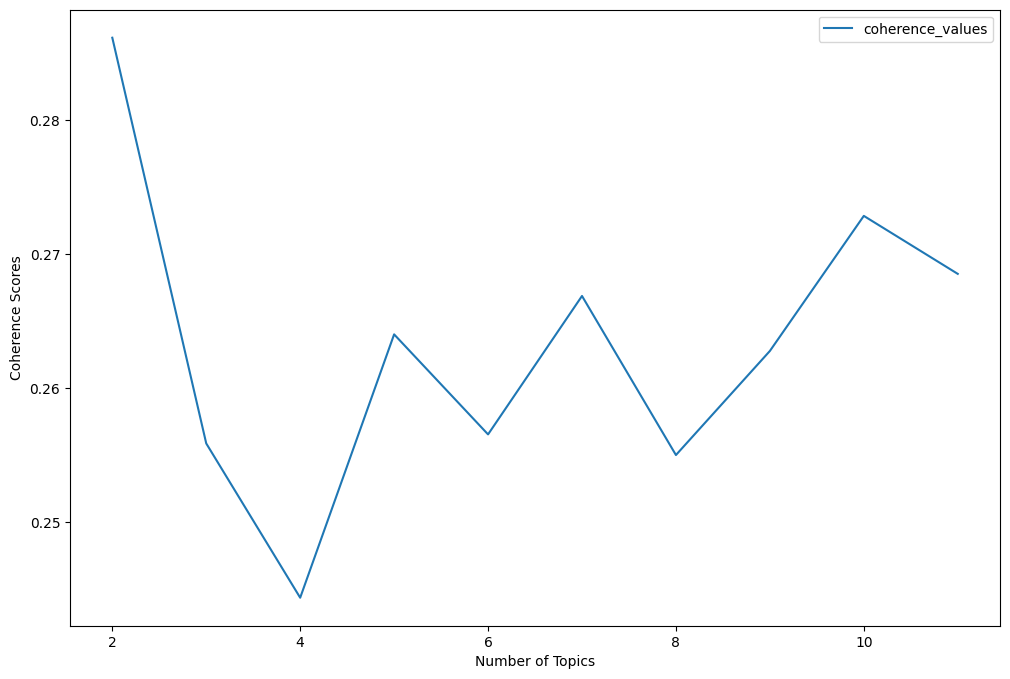

In [94]:
import matplotlib.pyplot as plt

# Plot coherence score for each number of topics
plt.plot(range(min_topics, max_topics + 1), coherence_values)

# Add labels and title
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Scores")

# Add legend
plt.legend(("coherence_values",), loc='best')

# Show the graph
plt.show()


In [ ]:
num_topics_lda = 7

lda_model = gensim.models.LdaModel(
    corpus=doc_term_fake,
    id2word=dictionary_fake,
    num_topics=num_topics_lda
)

lda_model.print_topics(num_topics=num_topics_lda, num_words=10)


In [ ]:
def tfidf_corpus(doc_term_matrix):
    tfidf = TfidfModel(corpus=doc_term_matrix, normalize=True)
    corpus_tfidf = tfidf[doc_term_matrix]
    return corpus_tfidf


In [97]:
def get_coherence_scores(corpus, dictionary, text, min_topics, max_topics):
    coherence_values = []
    model_list = []
    for num_topics_i in range(min_topics, max_topics+1):
        model = LsiModel(corpus, num_topics=num_topics_i, id2word=dictionary)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=text, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())

    plt.plot(range(min_topics, max_topics+1), coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values",), loc="best")
    plt.show()


In [98]:
corpus_tfidf_fake = tfidf_corpus(doc_term_fake)


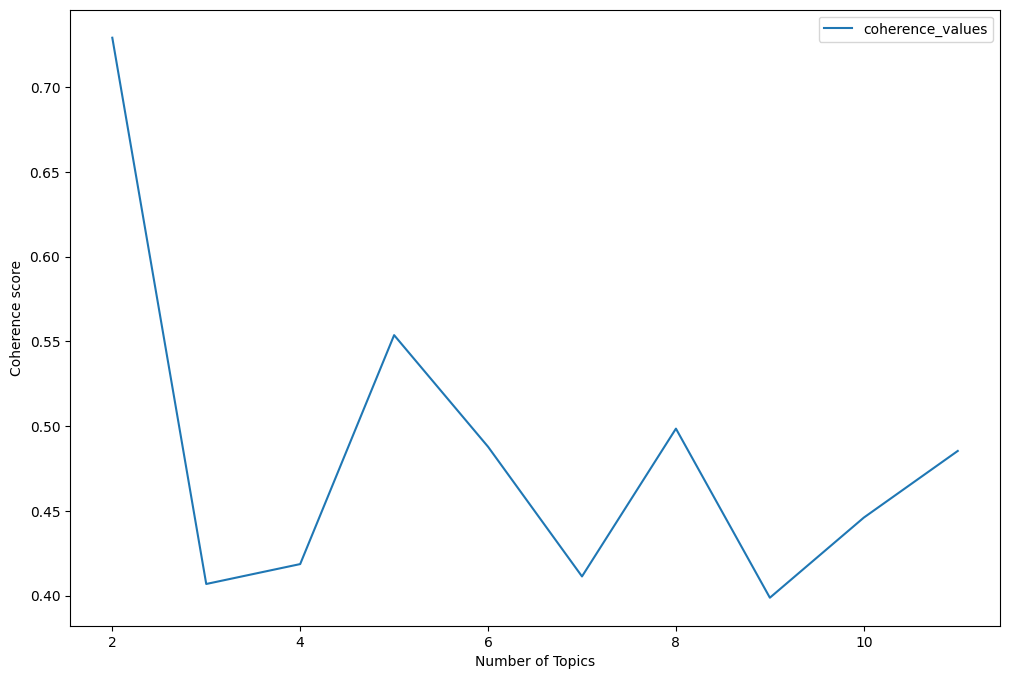

In [99]:
get_coherence_scores(
    corpus=corpus_tfidf_fake,
    dictionary=dictionary_fake,
    text=fake_news_text,
    min_topics=2,
    max_topics=11
)


In [100]:
corpus_tfidf_fake

In [101]:
   plt.plot(range(min_topics, max_topics+1), coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values",), loc="best")
    plt.show()

IndentationError: unexpected indent (2437902515.py, line 2)

In [ ]:
data.head()

In [ ]:
X = [','.join(map(str, l)) for l in data['text_clean']]
Y = data['fake_or_factual']

countvec = CountVectorizer()


In [ ]:
X = [' '.join(map(str, l)) for l in data['text_clean']]
y = data['fake_or_factual']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=0
)

model = make_pipeline(
    CountVectorizer(),
    LogisticRegression(max_iter=1000, random_state=0)
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))